In [1]:
!pip install mglearn

  Stored in directory: C:\Users\ktm\AppData\Local\pip\Cache\wheels\74\cf\8d\04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


In [2]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

C:\python\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\python\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


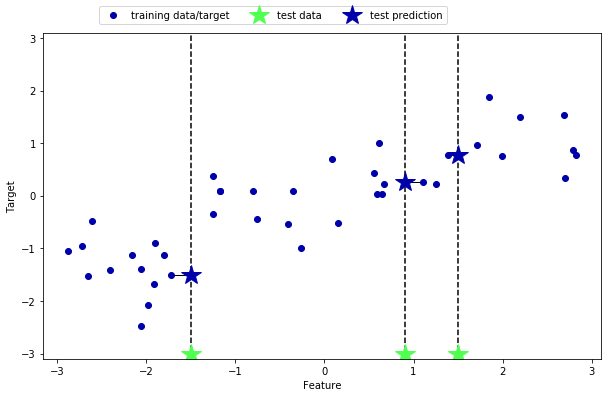

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
# 초록별 - 

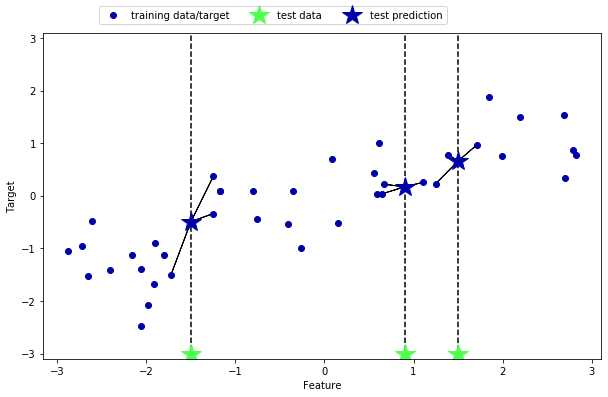

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

## 일반화, 과대적합, 과소적합
    모델이 처음보는 데이터에 대해 예측이 가능하다면 이를 훈련세트에서 테스트 세트로 일반화 (generalization)되었다고 한다.
    아주 복잡한 모델을 만든다면 훈련세트에만 정확한 모델이 된다.(과대적합)
    과대적합(overfitting)는 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터가 일반화되기 어려울 때 발생.
    반대로 모델이 너무 간단해서 잘 예측을 못함.(과소적합-underfitting)

In [9]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [11]:
cancer = load_breast_cancer()

print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행렬 : {}".format(cancer.data.shape))

print(cancer.keys())
print(cancer.items())

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
유방암 데이터의 행렬 : (569, 30)
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
dict_items([('data', array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])), ('target', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 

In [12]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X , Y, stratify=cancer.target, random_state=77)
# stratify - 층화추출해서 뽑겠다

In [14]:
# 머신러닝 모델 만들기 예측하기
# (1) 모델 만들기
# (2) 모델 학습시키기 model.fit()
# (3) 모델 예측. model.pridict()

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [20]:
(pred==y_test).sum()/(len(pred))

0.9090909090909091

In [27]:
acc_tr = model.score(X_train, y_train) # 주어진 데이터를 활용한 확인(자체 예측 후 확인 결과)
acc_test = model.score(X_test, y_test) # 주어진 데이터를 활용한 확인(자체 예측 후 확인 결과)

In [28]:
print("k : {}".format(3))
print("훈련 데이터셋 정확도 : {:.2f}".format(acc_tr))
print("테스트 데이터 셋 정확도 : {:.2f}".format(acc_test))

k : 3
훈련 데이터셋 정확도 : 0.96
테스트 데이터 셋 정확도 : 0.91


In [37]:
training_accuracy = []
test_accuracy = []
neighbors_numbers = range(1,11) # 1~10까지의 값
for n in neighbors_numbers:
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(X_train, y_train)
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    training_accuracy.append(acc_tr)
    test_accuracy.append(acc_test)
    
    print("k : {}".format(n))
    print("accuracy of training set : {:.2f}".format(acc_tr))
    print("accuracy of test set : {:.2f}".format(acc_test))

k : 1
accuracy of training set : 1.00
accuracy of test set : 0.89
k : 2
accuracy of training set : 0.97
accuracy of test set : 0.90
k : 3
accuracy of training set : 0.96
accuracy of test set : 0.91
k : 4
accuracy of training set : 0.95
accuracy of test set : 0.90
k : 5
accuracy of training set : 0.95
accuracy of test set : 0.92
k : 6
accuracy of training set : 0.96
accuracy of test set : 0.90
k : 7
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 8
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 9
accuracy of training set : 0.95
accuracy of test set : 0.91
k : 10
accuracy of training set : 0.94
accuracy of test set : 0.91
